* Watch out for scaling of job stats.

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from numpy.linalg import norm
import numpy as np
from itertools import product

# Look at Jobs

In [130]:
df_raw = pd.read_csv("job_data.csv", index_col="Job")
df_raw

,Strength,Agility,Vitality,Magic,ABP,Skills,Crystal
Job,,,,,,,
Bard,-8,8,-9,11,175,3,Fire
Beastmaster,13,1,8,-3,460,4,Fire
Berserker,21,-9,25,-23,500,2,Water
Black Mage,-9,0,-2,31,730,7,Wind
Blue Mage,-8,1,3,23,350,4,Wind
Chemist,2,3,6,-4,630,5,Earth
Dancer,5,5,-10,-5,400,3,Earth
Dragoon,18,5,15,-12,600,3,Earth
Geomancer,4,2,4,24,175,3,Fire


In [131]:
clustering = KMeans(n_clusters=3, random_state=0).fit(df_raw[["Strength", "Agility", "Vitality", "Magic"]])
df_clustered = df_raw.copy()
df_clustered["Cluster"] = clustering.labels_

In [132]:
df_clustered

,Strength,Agility,Vitality,Magic,ABP,Skills,Crystal,Cluster
Job,,,,,,,,
Bard,-8,8,-9,11,175,3,Fire,1
Beastmaster,13,1,8,-3,460,4,Fire,0
Berserker,21,-9,25,-23,500,2,Water,2
Black Mage,-9,0,-2,31,730,7,Wind,1
Blue Mage,-8,1,3,23,350,4,Wind,1
Chemist,2,3,6,-4,630,5,Earth,0
Dancer,5,5,-10,-5,400,3,Earth,0
Dragoon,18,5,15,-12,600,3,Earth,2
Geomancer,4,2,4,24,175,3,Fire,1


In [133]:
# function returns within cluster score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k, random_state=0).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
        
        # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]
            
            curr_sse += norm(np.array(points.iloc[i]) - curr_center, 2) ** 2
            #curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
        sse.append(curr_sse)
    return sse

In [134]:
sse = calculate_WSS(df_raw[["Strength", "Agility", "Vitality", "Magic"]], 20)

In [135]:
sse

[11554.700000000003,
 4187.824175824175,
 2003.160714285714,
 1672.708333333333,
 1349.9666666666665,
 1092.833333333333,
 901.2500000000001,
 688.1666666666666,
 541.8333333333334,
 398.00000000000006,
 304.83333333333337,
 213.16666666666669,
 148.16666666666669,
 85.16666666666667,
 56.833333333333336,
 38.5,
 21.500000000000004,
 10.5,
 3.5000000000000004,
 9.663546088957395e-30]

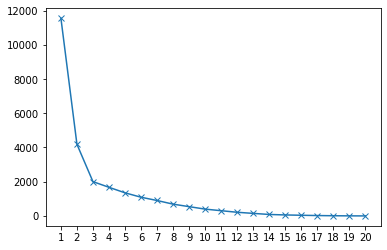

In [136]:
plt.plot(range(1, 21), sse, "x-")
plt.xticks(range(1, 21))
plt.show()

# Look at Parties

In [137]:
stats_cols = ["Strength", "Agility", "Vitality", "Magic"]
df_raw.loc[["Knight", "White Mage"]][stats_cols]

,Strength,Agility,Vitality,Magic
Job,,,,
Knight,23,1,20,-14
White Mage,-7,1,0,25


In [138]:
df_raw.loc[["Knight", "White Mage"]][stats_cols].sum()

Strength    16
Agility      2
Vitality    20
Magic       11
dtype: int64

In [139]:
# Get the list of all possible parties
jobs_by_crystal = []
for crystal in ["Wind", "Water", "Fire", "Earth"]:
    jobs_by_crystal.append(list(df_raw.loc[df_raw["Crystal"] == crystal].index))
jobs_by_crystal

[['Black Mage', 'Blue Mage', 'Knight', 'Monk', 'Thief', 'White Mage'],
 ['Berserker', 'Mystic Knight', 'Red Mage', 'Summoner', 'Time Mage'],
 ['Bard', 'Beastmaster', 'Geomancer', 'Ninja', 'Ranger'],
 ['Chemist', 'Dancer', 'Dragoon', 'Samurai']]

In [145]:
all_parties = list(product(*jobs_by_crystal))

In [150]:
party_stats = []
for party in all_parties:
    party_stats.append(np.array(df_raw.loc[list(party)][stats_cols].sum()))



In [151]:
party_stats[0:5]

[array([ 6,  2, 20, 15]),
 array([ 9,  4,  4, 14]),
 array([22,  4, 29,  7]),
 array([23,  1, 33,  7]),
 array([27, -5, 37,  1])]